# Preparacion de datos y *sklearn*

En esta ayudantía revisaremos un par de funciones útiles al momento de preparar los datos para entrenar un modelo, y un repaso de la sintaxis de *sklearn*, citando de la [documentación](https://scikit-learn.org/stable/getting_started.html)

*Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.* 

Es una de las librerias más utilies y completas al momento de usar modelos de *machine learning*, junto con [*tensor flow*](https://www.tensorflow.org/) otra librería que hace este trabajo. Durante esta ayudantía nos enfocaremos (y en el curso )en *Scikit-learn*, pero les recomiendo echar un ojo a *tensor flow* si el tópico les llama la antención

## Preprocesamiento de datos

En general, el preprocesamiento de datos es un area gigante, tener datos *limpios* es importante al momento de trabajar, es incluso necesario en algunos modelos que exigen, por ejemplo, que los datos estén normalizados, o tengan valores entre [0,1]. *Sklearn* tiene todo un módulo dedicado a preprocesamiento, pueden explorarlo en [esta parte de la documentación](https://scikit-learn.org/stable/modules/preprocessing.html), en este caso la función que usaremos será [`scale`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale).

Esta función, lo que hace es tomar los datos y normalizarlos, i.e., los deja con media 0 y desviación estandard 1. Podemos verlo en el sig ejemplo:

In [1]:
from sklearn import preprocessing
import numpy as np

In [2]:
X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

En este caso lo usamo con un `array`, pero el caso es análogo para un dataframe con valroes numéricos. Revisemos el resultado

In [3]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [4]:
X_scaled.std(axis=0)

array([1., 1., 1.])

Podemos ver que se realizó la transformación, y quedamos con los datos normalizados. Como esta hay muchas herramientas que estan a su alcanze para realizar este trabajo, así que les pido revisar la [documentación](https://scikit-learn.org/stable/modules/preprocessing.html) para que se hagan una idea del abanico de posiblidades que hay.

Otra funcion extremadamente útil al momento de jugar con los datos es [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), esta función separa los datos de en dos conjuntos, los datos con los que vamos a entrenar, y los datos que usaremos para evaluar el desempeño de nuestro modelo, veamos como funciona:

In [5]:
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [6]:
list(y)

[0, 1, 2, 3, 4]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train, y_train,

(array([[4, 5],
        [0, 1],
        [6, 7]]),
 [2, 0, 3])

In [9]:
 X_test, y_test

(array([[2, 3],
        [8, 9]]),
 [1, 4])

Podemos ver que los datos fueron separados, esto nos permite entrenar nuestro modelo con un conjunto de datos, y tener otro separado para evaluar su desempeño, lo que es sumamente importante a la hora de trabajar con modelos de *machine learning*

## SKlearn y su sintaxis

Para realizar un repaso de como es la sintaxis en *sklearn* vamos a revisar uno de los ejemplos clásicos de *machine learning*, clasificar numeros escritos a mano, para esto vamos a importar las liberías necesarias y obtener los datos que vamos a utilizar

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()

Ahora, veamos como son los datos, estos son matrices de 8x8 con valores entre 0 y 16.

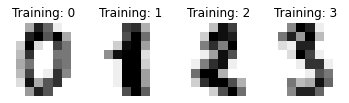

In [11]:
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[:], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Lo primero que haremos será usar `reshape` para "aplanar" los datos, ya que la mayoría de los modelos nos piden ingresar datos de esto forma, como un vector. ¿Se pierde información al hacer esto?

In [12]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Ahora es cuando viene lo "duro" de sklearn, esta librería funciona creando *objetos* que son los modelos, en este caso creamos un objeto al que llamamos `classifier`, que es un modelo [`svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) o C-Support Vector Classification, no es importante que sepan lo que hace el modelo para este ejemplo, pero pueden leer la [documentación](C-Support Vector Classification.) de todas formas.

In [13]:
classifier = svm.SVC(gamma=0.001)
classifier

SVC(gamma=0.001)

Como pueden ver, `classifier` es un objeto del tipo `SVC(gamma=0.001)`, i.e., es un modelo SVC con parametro `gamma=0.001`. Pero este por si solo no puede hacer nada, para esto hay que entrenarlo, que es a lo que vamos a proceder en este momento. Primero usaremos `train_test_split` para dividir los datos como ya mencionamos anteriormente.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

Con esto listo, usaremos el metodo `.fit(*data*)` para ajustar nuestro modelo. Esto lo que hace "ajustar"  los parametros del modelo (i.e. entrenar) para obtener los "mejores resultados"; ¿qué significa "ajustar" y que son "los mejores resultados"? Depende del modelo, e incluso quizás de la aplicación que quieras darle a este, puedes leer la documenación del modelo que estés usando para revisar que es lo que se est+a hacoendo (pero no te extrañe que mucha gente los ocupa simplemente como *black boxes*)

In [15]:
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

Ahora, con nuestro modelo "entrenado", podemos usar el método `predict(*data*)` para pedirle a nuestro modelo que prediga el resultado en nuestros datos que dejamos para probar el rendiemiento

In [16]:
predicted = classifier.predict(X_test)

Y, ¿como nos fue?

In [17]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Le podemos pedir un `.classification_report(y_test, predicted)` para que nos diga como estuvo, podemos ver que en general, le fue bien, algunos digitos mejores que a otros, pero en promedio tuvo un 97% de precición, ¿es esto suficiente? Para un pequeño clasificador de numeros *for fun* si, pero eso dependerá de la aplicación que esten buscando, y qué es lo que significa para ustedes equivocarse. ¿Se subirián a un auto que 3% de las veces al ver un camión determina "ahí no hay nada"?. 

Veamos un poco como fueron las predicciones:

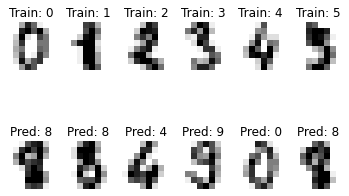

In [18]:
_, axes = plt.subplots(2, 6)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Train: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Pred: %i' % prediction)

Es claro que hay numeros más claros que otros, pero, ¿podemos mejorar este resulatado? Quizás. Puede que haya otros modelos que se porten mejor con estos datos ¿recuerdan cuando mencioné si se perdían datos al pasar las matrices a vectortes? La respuesta es si, se pierde inforamcón espacial, sobre que "pixeles" están uno sobre el otro, existen modelos que pueden tomar estos datos posicionales en cuenta, lo dejo en tus mamos revisar si estos obtendrían mejores resulatados o no, pero ahora te toca a ti preparar un modelo. 

## Actividad

Para está actividad usaremos el *Dataset* de *Kaggle* [Sao Paulo Real Estate - Sale / Rent - April 2019](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019), en este tenemos 9 atributos que usaremos con el fin de tratar de predecir cual es el precio que tomaran estos lugares. Comenzaremos como siempre, importando nuestras librerías e invocando nuestros datos

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/sao-paulo-properties-april-2019.csv')
df.head()

Ahora, nos desaremos de las columnas que no son necesarías, además de arreglar el formato de las que si vamor a utilizar

In [ ]:
df.drop(columns = ['District', 'Property Type', 'Latitude', 'Longitude'], inplace = True)
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

Ahora podemos ver que tenemos dos `negotiation_type`, que son `rent` y `sale`, obviamente cada uno de estos viene con un rango de precios disinto. Nos interesa saber cuanto datos tenemos para cada tipo, así que lo primero que haremos será revisar cuantos datos tenemos para cada dato.

In [ ]:
#fill

Podemos ver que tenemos bastantes datos de cada uno, por lo que podemos usar cada uno de estos como un *dataset* distinto y tratar de predecirlos por separado. Crea dos dataframes que contengan los datos para arriendo y venta respectivamente

In [ ]:
rent = #fill
sale = #fill

Ahora, empezemos por separar los datos en las varibables objetivo (comunmente denominadas como `y`) y los datos que usaremos para modelar (comunmente denominadas como `X`), separa estos datos en las varibles correspondientes (ten en cuenta que la variable objetivo es `price` y los datos son todas las demas columnas excepto `negotiation_type`). Comenzarem,os con los datos de `rent`

In [ ]:
X = #fill
y = #fill

Ahora usa [`preprocessing.scale()`](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) para escalar los datos, recuerda que esto los deja con promedio 0 y desviación estandar 1 

In [ ]:
from sklearn import preprocessing
X_scaled = #fill

Ahora, necesitamos tener datos para poder comprobar la eficacia de nuestro modelo, para eso utiliza [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para dejar un 20% de los datos para ser utilizados para medir la eficacia del modelo, además usa `random_state=42` para reproducibilidad

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = #fill

Ya con todo esto listo, usaremos [`linear_model`](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) para modelar los datos, primero importaremos las librerías, además usaremos [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) y [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) para medir la eficacia de los modelos. 

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Ahora crea la regresión lineal

In [ ]:
regr = #fill

Ahora usa `.fit()` para ajustar el modelo

In [ ]:
#fill

Y ahora usa `.predict()` para generar las predicciones 

In [ ]:
y_pred = #fill

Ahora, imprime los coeficientes, el error cuadratico medio y el coeficiente de determinación (r2) para evaluar el desempeño de nuestro modelo

In [ ]:
#fill

¿Qué te parece el resultado de nuesto modelo? ¿Crees que se pordría mejorar? ¿Qué harías tú para mejorar el desempeño del modelo?

**Respuesta:**

Ahora, repite este proceso para los datos de `sale`

In [ ]:
#fill

En verdad los resultados con este modelo no fueron muy buenos, te invito a revisar la [documentación de los modelos de sklearn](https://scikit-learn.org/stable/user_guide.html) y revisar si es que hay alguno que te llame la antención, y puedas usar para mejorar el puntaje.